In [230]:
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from scipy import signal

In [215]:
class Point_Cloud():
    def __init__(self, path, frame_size=60):
        self.path = path
        self.frame_size = frame_size
        self.data_frames = None

        self.parse_data()

    
    def parse_data(self, max=3, min=0.3):
        print("Loading Point Cloud Data...")
        with open(self.path, "r") as f:
            dataRaw = f.read()
            f.close()
        point_data = {"pointID":[], "x":[], "y":[], "z":[]}

        for data in dataRaw.split("---\n")[:-1]:
            line = data.split("\n")
            if np.float(line[7].split(": ")[1]) < max and np.float(line[7].split(": ")[1]) > min:
                point_data["pointID"].append(np.float(line[6].split(": ")[1]) )
                point_data["x"].append(np.float(line[7].split(": ")[1]) )
                point_data["y"].append(np.float(line[8].split(": ")[1]) )
                point_data["z"].append(np.float(line[9].split(": ")[1]) )

        for key in point_data.keys():
            print(key, len(point_data[key]))

        data_frames = []
        for f_num in np.arange(0, len(point_data["x"])//self.frame_size):
            s = f_num*self.frame_size
            e = (f_num+1)*self.frame_size
            frame = [point_data["x"][s:e], point_data["y"][s:e], point_data["z"][s:e]]
            data_frames.append(frame)

        self.data_frames = np.array(data_frames)
        print("data_frames shape:", np.shape(self.data_frames))
        print("Loading Success!")
    
    def get_cluster_items(self, frame_id=0, cluster_idx = 0, eps=0.1, min_samples=5):
        if frame_id != -1:
            data_frame = self.data_frames[frame_id].T
        else:
            data_frame = np.concatenate(self.data_frames.T, axis=1).T
        
        cluster = np.array(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data_frame))
        idx = np.argwhere(cluster == cluster_idx).T
        return data_frame[idx][0]
    
    def get_cluster(self, frame_id=0, eps=0.1, min_samples=5, cluster_idx=None):
        if frame_id != -1:
            data_frame = self.data_frames[frame_id]
        else:
            data_frame = np.concatenate(self.data_frames.T, axis=1).T
        if cluster_idx != None:
            cluster = np.array(DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data_frame))
            return cluster

        return DBSCAN(eps=eps, min_samples=min_samples).fit_predict(data_frame.T)

    def label2color(self, labels):
        color = ["b", "g", "r", "c", "m", "y", "k", "w"]
        out = []
        for i,l in enumerate(labels):
            out.append(color[l])
        return out
    
    def get_label_analysis(self, lables):
        num = np.max(lables) + 1
        print("noises: ",  len(np.argwhere(lables == -1)), len(np.argwhere(lables == -1))/len(lables))

        color = ["b", "g", "r", "c", "m", "y", "k", "w"]
        for i in range(num):
            print(i, color[i], len(np.argwhere(lables == i)), len(np.argwhere(lables == i))/len(lables)) 
    
    def plot_cluster(self, cluster_idx, frame_id):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        point_scatter = ax.scatter3D(self.data_frames[frame_id][0][cluster_idx], self.data_frames[frame_id][1][cluster_idx], self.data_frames[frame_id][2][cluster_idx], cmap="Greens")
        # ax.scatter3D([0], [0], [0], linewidths = 10, c = "r")

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.view_init(elev=30, azim=135)

        fig = plt.figure()
        plt.scatter(self.data_frames[frame_id][1][cluster_idx], self.data_frames[frame_id][2][cluster_idx])
        plt.xlabel("y")
        plt.ylabel("z")

    def plot_points(self, frame_id=0, eps=0.1, min_samples=5, cluster_idx=0):
        clustering = self.get_cluster(frame_id, eps, min_samples)

        colors = self.label2color(clustering)

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.data_frames[frame_id][0], self.data_frames[frame_id][1], self.data_frames[frame_id][2], c=colors)
        ax.scatter3D([0], [0], [0], linewidths = 10, c = "r")

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.view_init(elev=30, azim=135)
        

        print("Cluster Pred: ")
        self.get_label_analysis(clustering)

        self.plot_cluster(np.argwhere(clustering == cluster_idx), frame_id)
    


b : blue.
g : green.
r : red.
c : cyan.
m : magenta.
y : yellow.
k : black.
w : white

Loading Point Cloud Data...
pointID 1216
x 1216
y 1216
z 1216
data_frames shape: (20, 3, 60)
Loading Success!
Cluster Pred: 
noises:  0 0.0
0 b 22 0.36666666666666664
1 g 5 0.08333333333333333
2 r 5 0.08333333333333333
3 c 28 0.4666666666666667


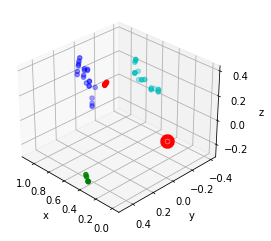

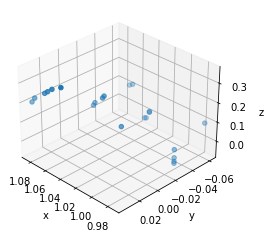

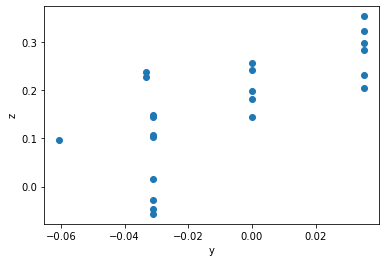

In [216]:
file_name = "/Users/xin/Desktop/millimeter wave/code_exp/cloud_point/stationary_2_items_facing_up_1m.txt"
pc_2 = Point_Cloud(path=file_name, frame_size=60)
pc_2.plot_points(frame_id=10, eps=0.1, min_samples=5, cluster_idx=0)

Loading Point Cloud Data...
pointID 799
x 799
y 799
z 799
data_frames shape: (13, 3, 60)
Loading Success!
Cluster Pred: 
noises:  1 0.016666666666666666
0 b 34 0.5666666666666667
1 g 25 0.4166666666666667


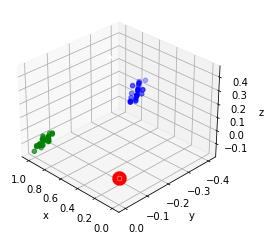

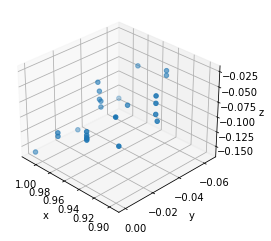

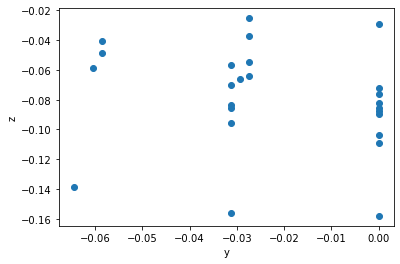

In [217]:
file_name = "/Users/xin/Desktop/millimeter wave/code_exp/cloud_point/stationary_box_facing_up_1m.txt"
pc = Point_Cloud(path=file_name, frame_size=60)
pc.plot_points(frame_id=6, eps=0.1, min_samples=5, cluster_idx=1)

In [312]:
class Vital_Signal():
    def __init__(self, data, fs=60):
        self.data = data
        self.fs = fs


    def get_vital_signal(self, low=0.85, high=1.5, nperseg=10):
        f, t, Sxx = signal.spectrogram(self.data, fs=self.fs, nperseg=nperseg)
        
        idx = np.argwhere(np.logical_and(f>=low, f<=high))
        heart_f = f[idx].squeeze()
        heart_Sxx = Sxx[idx].squeeze()

        plt.pcolormesh(t, heart_f, heart_Sxx, shading='nearest')
        # plt.title("Heartneat")
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()

        


In [278]:
me = pc.get_cluster_items(frame_id=-1, cluster_idx=0)
np.shape(me)

(461, 3)

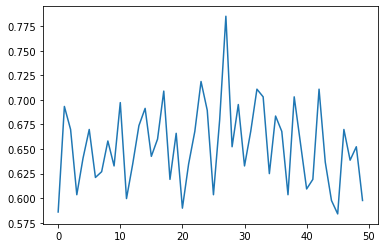

In [313]:
X = me[:,0][:50]

plt.plot(np.arange(len(X)), X )

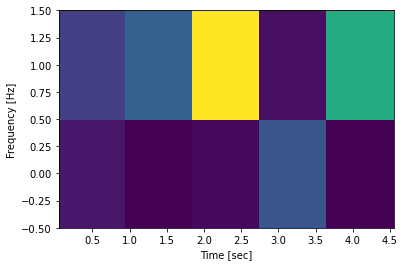

In [314]:
vs = Vital_Signal(X, fs=10)
vs.get_vital_signal(low=0.0, high=1.5, nperseg=10)